In [5]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np 
import os 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

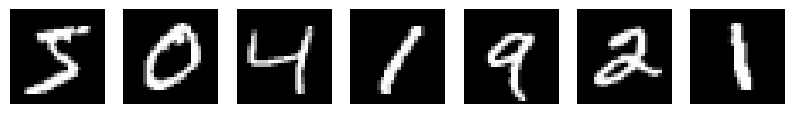

In [2]:

# Load directly from Keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Display some images
plt.figure(figsize=(10, 5))
for i in range(7):
    plt.subplot(1, 7, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
plt.show()


In [3]:
x_train_normalize=X_train.astype("float32")/255.0
x_test_normalize=X_test.astype("float32")/255.0

In [ ]:
datagen=ImageDataGenerator(
    rotation_range=30,# rotate up to 30 degrees
    horizontal_flip=True,# randomly flip images horizontally
    vertical_flip=False
)


datagen.fit(x_train_normalize)

plt.figure(figsize=(10,5))
for i in range(6):
        plt.subplot(2, 3, i+1)
        plt.imshow(x_train_normalize[i], cmap="gray")
        plt.axis("off")
plt.show()